In [1]:
import multiprocessing as mp
from fit_dftemplater import *

In [5]:
def templateDataFrames(variation):
    baseDir = common.getBaseDirectory()
    signal = False
    if signal:
        region = 'signal'
    else:
        region = 'control'

    tp = DFTemplater(variation, signalRegion=signal)
    xShp,xCnt,yShp,yCnt = tp.makeTemplatesAndTargets()
    
    # save the template and target
    np.save(baseDir + "data/templates/shaping_{}Region/X_{}".format(region,variation),xShp)
    np.save(baseDir + "data/templates/counting_{}Region/X_{}".format(region,variation),xCnt)
    if variation == '':
        np.save(baseDir + "data/templates/shaping_{}Region/Y_".format(region),yShp)
        np.save(baseDir + "data/templates/counting_{}Region/Y_".format(region),yCnt)
    
def runTemplateDataFrames(vlist):
    processes = []
    for v in vlist:
        processes.append(mp.Process(target=templateDataFrames,args=(v,)))
    for ps in processes:
        ps.start()
    for ps in processes:
        ps.join()

In [6]:
runTemplateDataFrames(['EPtDown','MuPtDown','TauPtDown',""]) # lepEnergy
runTemplateDataFrames(["JESUp","JESDown","JERUp","JERDown"]) # jetEnergy
runTemplateDataFrames(["BTagUp","BTagDown","MistagUp","MistagDown"]) # bTagging

## make some plots

In [3]:
baseDir = common.getBaseDirectory()
X = np.load(baseDir + "data/templates/counting_signalRegion/X_.npy")
Y = np.load(baseDir + "data/templates/counting_signalRegion/Y_.npy")

In [4]:
temp = np.concatenate(X,axis=1)
targ = np.concatenate(Y,axis=0)
# separate processes
mctt = np.sum(temp[0:21],axis=0)
mct  = np.sum(temp[21:42],axis=0)
mcw  = temp[42]
mcz  = temp[43]
mcvv = temp[44]
qcd  = temp[45]
mclist = [qcd,mcvv,mcz,mcw,mct,mctt]

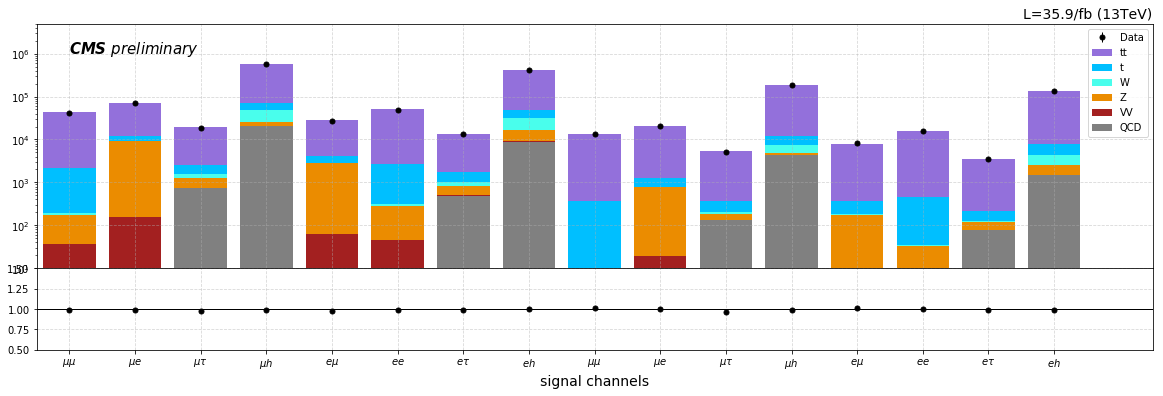

In [21]:
colorList = ["gray","#a32020","#eb8c00","#49feec","deepskyblue","mediumpurple"]
labelList = ["QCD","VV","Z","W","t","tt"]
chList = common.channelLsit()


fig, axes = plt.subplots(2, 1, sharex=True, facecolor='w',
                         gridspec_kw={'height_ratios':[3,1]},
                         figsize=(20,6))
fig.subplots_adjust(hspace=0)


c = np.arange(targ.size)
accum = np.zeros(targ.size)

# making plot

ax = axes[0]
for i in range(len(mclist)):
    height = mclist[i]
    ax.bar(c, height, bottom=accum, width=0.8, alpha=1, color=colorList[i],label=labelList[i])
    accum += height
ax.errorbar(c, targ,yerr=targ**0.5, c='k', fmt='.',markersize=10,lw=1, label='Data')
ax.grid(True,linestyle="--",alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.set_yscale('log')
ax.set_ylim(10,5e6)
ax.text(0, 1e6, r'CMS $preliminary$',style="italic",fontsize="15",fontweight='bold')
ax.set_title("L=35.9/fb (13TeV)",loc="right",fontsize=14)

ax = axes[1]
ax.errorbar(c, targ/accum, yerr=targ**0.5/accum, c='k', fmt='.',markersize=10,lw=1)
ax.grid(True,linestyle="--",alpha=0.5)
ax.axhline(1,lw=1,color='k')
ax.set_ylim(0.5,1.5)
ax.set_xlim(c.min()-0.5, 1.1*c.max())
ax.set_xlabel('signal channels',fontsize=14)


plt.xticks(c, chList*2)
plt.savefig('../plots/combine/counting.png',dpi=300)